In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

CO2_df = pd.read_csv('owid-co2-data.csv')
CO2_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [45]:
CO2_df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
co2_per_capita                         float64
trade_co2                              float64
cement_co2                             float64
cement_co2_per_capita                  float64
coal_co2                               float64
coal_co2_per_capita                    float64
flaring_co2                            float64
flaring_co2_per_capita                 float64
gas_co2                                float64
gas_co2_per_capita                     float64
oil_co2                                float64
oil_co2_per_capita                     float64
other_industry_co2                     float64
other_co2_per_capita                   float64
co2_growth_prct                        float64
co2_growth_abs                         float64
co2_per_gdp                            float64
co2_per_unit_

In [46]:
# Dropping Columns that have more than 90% Nan Values
CO2_df.dropna(thresh=len(CO2_df)*0.9, axis='columns')
# CO2_df = CO_df.reset_index()

,country,year,co2,co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,share_global_co2,share_global_cumulative_co2,population
0,Afghanistan,1949,0.015,0.002,NaN,NaN,0.015,0.00,0.00,7624058.0
1,Afghanistan,1950,0.084,0.011,475.00,0.070,0.099,0.00,0.00,7752117.0
2,Afghanistan,1951,0.092,0.012,8.70,0.007,0.191,0.00,0.00,7840151.0
3,Afghanistan,1952,0.092,0.012,0.00,0.000,0.282,0.00,0.00,7935996.0
4,Afghanistan,1953,0.106,0.013,16.00,0.015,0.388,0.00,0.00,8039684.0
...,...,...,...,...,...,...,...,...,...,...
25186,Zimbabwe,2016,10.738,0.765,-12.17,-1.488,736.467,0.03,0.05,14030338.0
25187,Zimbabwe,2017,9.582,0.673,-10.77,-1.156,746.049,0.03,0.05,14236599.0
25188,Zimbabwe,2018,11.854,0.821,23.72,2.273,757.903,0.03,0.05,14438812.0
25189,Zimbabwe,2019,10.949,0.748,-7.64,-0.905,768.852,0.03,0.05,14645473.0


In [47]:
usa_df = CO2_df[CO2_df['country'].isin(['United States'])]
usa_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,USA,United States,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,USA,United States,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,USA,United States,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,USA,United States,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,USA,United States,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,USA,United States,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,USA,United States,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,USA,United States,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,USA,United States,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [48]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
usa_df = usa_df.drop(columns=["iso_code","country"], axis=1)
usa_df

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,0.161,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,0.173,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,0.217,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,0.257,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [50]:
# Generate our categorical variable list
usa_cat = usa_df.dtypes[usa_df.dtypes == "float64"].index.tolist()

# Check the number of unique values in each column
usa_df[usa_cat].nunique()

co2                                    220
co2_per_capita                         216
trade_co2                               30
cement_co2                             108
cement_co2_per_capita                   57
coal_co2                               220
coal_co2_per_capita                    215
flaring_co2                             70
flaring_co2_per_capita                  57
gas_co2                                138
gas_co2_per_capita                     138
oil_co2                                161
oil_co2_per_capita                     157
other_industry_co2                      94
other_co2_per_capita                    64
co2_growth_prct                        214
co2_growth_abs                         208
co2_per_gdp                            184
co2_per_unit_energy                     20
consumption_co2                         30
consumption_co2_per_capita              30
consumption_co2_per_gdp                 27
cumulative_co2                         221
cumulative_

In [51]:
co2_counts = usa_df.co2.value_counts()
co2_counts

0.333       2
272.162     1
26.791      1
1052.813    1
4663.165    1
           ..
45.320      1
1203.861    1
33.159      1
5421.502    1
24.633      1
Name: co2, Length: 220, dtype: int64

<AxesSubplot:ylabel='Density'>

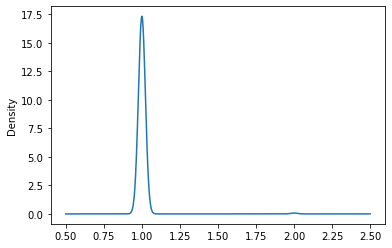

In [52]:
# Visualize the value counts
co2_counts.plot.density()

In [56]:
X

,year,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,1800,0.042,NaN,NaN,NaN,0.253,0.042,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,1801,0.044,NaN,NaN,NaN,0.267,0.044,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,1802,0.046,NaN,NaN,NaN,0.289,0.046,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,1803,0.047,NaN,NaN,NaN,0.297,0.047,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,1804,0.052,NaN,NaN,NaN,0.333,0.052,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,0.161,1502.475,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,2017,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,0.173,1480.059,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,2018,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,0.217,1641.041,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,2019,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,0.257,1694.894,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [57]:
y

23834       0.253
23835       0.267
23836       0.289
23837       0.297
23838       0.333
           ...   
24050    5248.024
24051    5207.751
24052    5375.491
24053    5255.816
24054    4712.771
Name: co2, Length: 221, dtype: float64

In [65]:
for column in usa_df.columns:
    print(f"column {column} has {usa_df[column].isnull().sum()} null values")

column year has 0 null values
column co2 has 0 null values
column co2_per_capita has 0 null values
column trade_co2 has 191 null values
column cement_co2 has 80 null values
column cement_co2_per_capita has 80 null values
column coal_co2 has 0 null values
column coal_co2_per_capita has 0 null values
column flaring_co2 has 150 null values
column flaring_co2_per_capita has 150 null values
column gas_co2 has 82 null values
column gas_co2_per_capita has 82 null values
column oil_co2 has 60 null values
column oil_co2_per_capita has 60 null values
column other_industry_co2 has 104 null values
column other_co2_per_capita has 104 null values
column co2_growth_prct has 1 null values
column co2_growth_abs has 1 null values
column co2_per_gdp has 22 null values
column co2_per_unit_energy has 166 null values
column consumption_co2 has 191 null values
column consumption_co2_per_capita has 191 null values
column consumption_co2_per_gdp has 192 null values
column cumulative_co2 has 0 null values
colum

In [58]:
# Remove diabetes outcome target from features data
y = usa_df.co2 
X = usa_df.drop(columns="co2")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50


ValueError: in user code:

    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 57)


In [53]:
population_counts = usa_df.population.value_counts()
population_counts

194932400.0    1
275175309.0    1
177751477.0    1
168736390.0    1
223135659.0    1
              ..
11834416.0     1
13619015.0     1
26677755.0     1
15208954.0     1
23599506.0     1
Name: population, Length: 221, dtype: int64

In [15]:
capita_co2_counts= CO2_df.co2_per_capita.value_counts()
capita_co2_counts

0.000     97
0.002     88
0.004     79
0.003     74
0.006     72
          ..
9.575      1
6.525      1
12.889     1
1.932      1
4.937      1
Name: co2_per_capita, Length: 8641, dtype: int64

<AxesSubplot:ylabel='Density'>

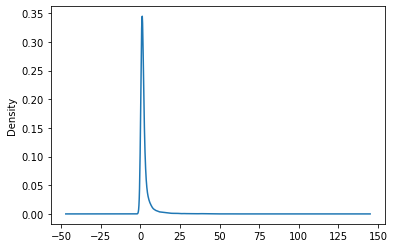

In [16]:
capita_co2_counts.plot.density()

In [ ]:
    
for column in all_homes_df.columns:
    print(f"column {column} has {all_homes_df[column].isnull().sum()} null values")

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20